# Regressions with FIFA data

### Loading the data

In [8]:
import pandas as pd

player20_path = "C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Kaggle project\\players_20.csv"
combine_path = ["C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Kaggle project\\players_20.csv",
               "C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Kaggle project\\players_19.csv",
               "C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Kaggle project\\players_18.csv",
               "C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Kaggle project\\players_17.csv",
               "C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Kaggle project\\players_16.csv"]
dataframes = []
for combine_data in combine_path :
    df = pd.read_csv(combine_data)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
fifa_data = combined_df[['sofifa_id','short_name','age','nationality','overall','potential','pace','shooting','year','dribbling']]

fifa_data

,sofifa_id,short_name,age,nationality,overall,potential,pace,shooting,year,dribbling
0,158023,L. Messi,32,Argentina,94,94,87.0,92.0,2020,96.0
1,20801,Cristiano Ronaldo,34,Portugal,93,93,90.0,93.0,2020,89.0
2,190871,Neymar Jr,27,Brazil,92,92,91.0,85.0,2020,95.0
3,200389,J. Oblak,26,Slovenia,91,93,NaN,NaN,2020,NaN
4,183277,E. Hazard,28,Belgium,91,91,91.0,83.0,2020,94.0
...,...,...,...,...,...,...,...,...,...,...
85525,224867,R. Horne,19,England,44,57,63.0,40.0,2016,47.0
85526,229852,C. Shephard,17,Wales,44,56,69.0,34.0,2016,49.0
85527,227910,L. Gooch,17,England,44,54,NaN,NaN,2016,NaN
85528,225339,S. Warburton,18,England,44,51,58.0,28.0,2016,45.0


### Correlations of the FIFA data

<Axes: >

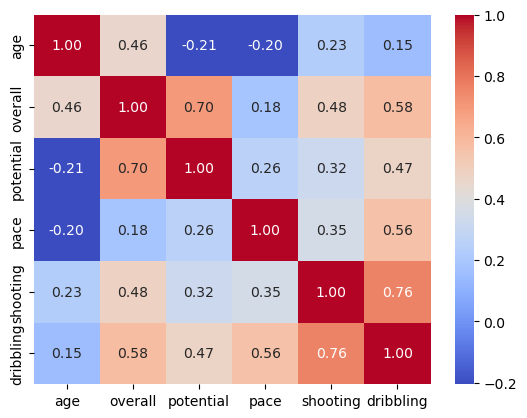

In [9]:
import seaborn as sns
fifa_corr = fifa_data[['age','overall','potential','pace','shooting','dribbling']].corr()
sns.heatmap(data=fifa_corr, cmap='coolwarm', annot=True, fmt=".2f") 

In [10]:
# The two variables with the storngest correlation is dribbling and shooting with 0.76

### Linear Regression 

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [12]:
fifa_temp = fifa_data.copy()
fifa_reg = fifa_temp.dropna()

# dropping the NA values because they are goalkeepers and dribbling and shooting are not recored 

In [13]:
x_train, x_test, y_train, y_test = train_test_split(fifa_reg[['dribbling']], fifa_reg[['shooting']],
                                                    test_size=0.33 , random_state=45)

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
model.score(x_test, y_test)

0.5808960292921845

### Plots of residuals 

In [16]:
import seaborn as sns

<Axes: >

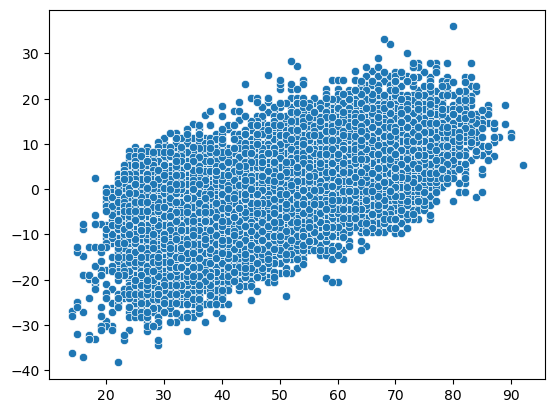

In [17]:
#For the test dataset
y_pred_test = model.predict(x_test)
res_test = y_test - y_pred_test
sns.scatterplot(x=y_test.values.flatten(), y=res_test.values.flatten())

<Axes: >

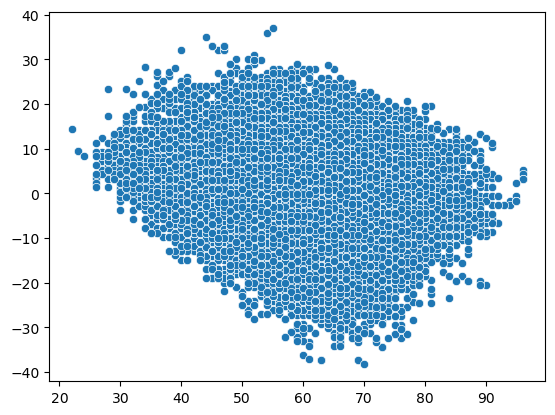

In [18]:
#For entire dataset 
y_pred_all =model.predict(fifa_reg[['dribbling']])
res_all = fifa_reg[['shooting']] - y_pred_all
sns.scatterplot(x=fifa_reg[['dribbling']].values.flatten(), y=res_all.values.flatten())

### Predicting 

In [19]:
pre_df = pd.DataFrame({'Actual': y_test['shooting'].values.flatten(),
                                'Predicted': y_pred_test.flatten()})
pre_df

,Actual,Predicted
0,43.0,47.091946
1,38.0,46.076824
2,44.0,47.091946
3,41.0,44.046580
4,65.0,50.137312
...,...,...
25071,79.0,69.424632
25072,49.0,56.228045
25073,64.0,60.288533
25074,35.0,52.167557


<Axes: >

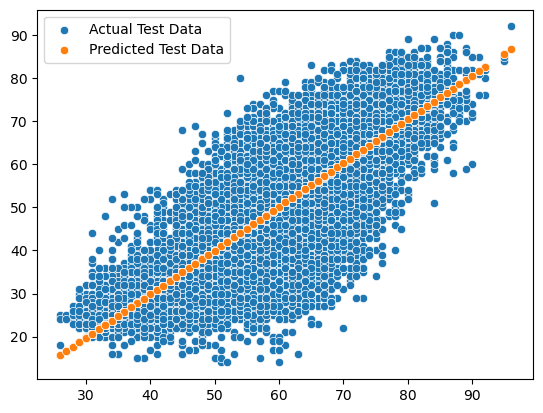

In [20]:
# Plot of the Test data 
sns.scatterplot(x=x_test.values.flatten(), y=y_test.values.flatten(), label='Actual Test Data')
sns.scatterplot(x=x_test.values.flatten(), y=y_pred_test.flatten(), label='Predicted Test Data', marker='o')

<Axes: >

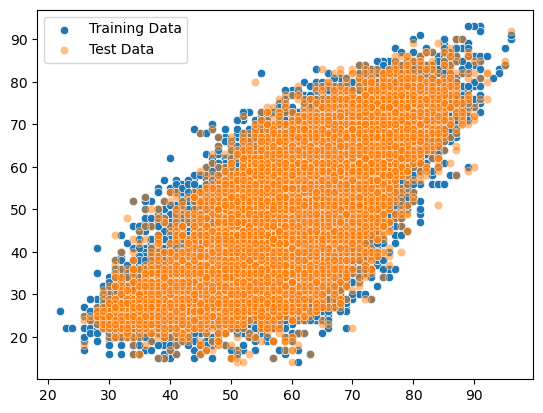

In [21]:
# Plot of the training data
sns.scatterplot(x=x_train.values.flatten(), y=y_train.values.flatten(), label='Training Data')
sns.scatterplot(x=x_test.values.flatten(), y=y_test.values.flatten(), label='Test Data', alpha=0.5)

<Axes: >

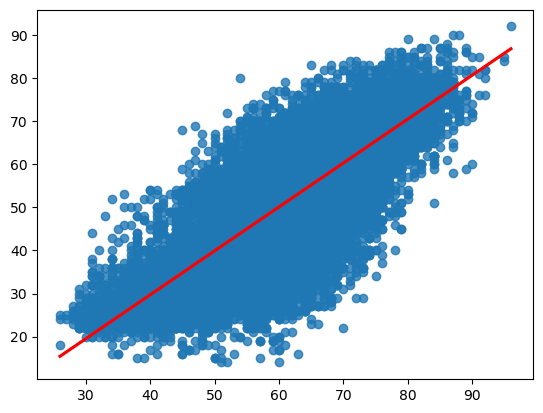

In [22]:
# Plot of the regression
sns.regplot(x=x_test.values.flatten(), y=y_test.values.flatten(), ci=None, line_kws={"color": "red"})

<Axes: >

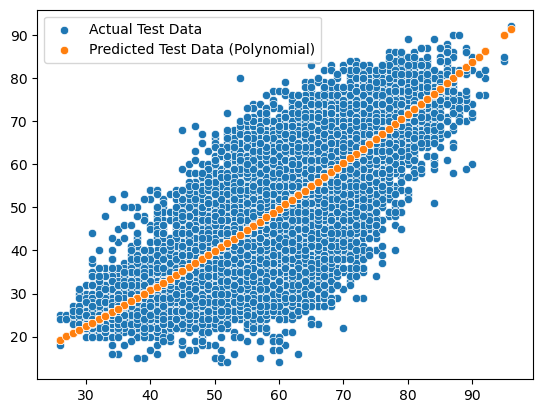

In [23]:
#Polynoimal plot
p = 2
poly_f = PolynomialFeatures(degree=p)
x_train_poly = poly_f.fit_transform(x_train)
x_test_poly = poly_f.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

y_pred_poly = poly_model.predict(x_test_poly)

sns.scatterplot(x=x_test.values.flatten(), y=y_test.values.flatten(), label='Actual Test Data')
sns.scatterplot(x=x_test.values.flatten(), y=y_pred_poly.flatten(), label='Predicted Test Data (Polynomial)', marker='o')

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming x_test and y_test are your test data
# Assuming you have a fitted model or some regression line (for example, "reg_line")

# Make predictions using the regression line or model
y_pred = reg_line.predict(x_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Create the regression plot
sns.regplot(x=x_test.values.flatten(), y=y_test.values.flatten(), ci=None, line_kws={"color": "red"})

# Annotate with R-squared value
plt.annotate(f'R² = {r_squared:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

plt.show()

NameError: name 'reg_line' is not defined

ValueError: operands could not be broadcast together with shapes (100,) (25076,) 

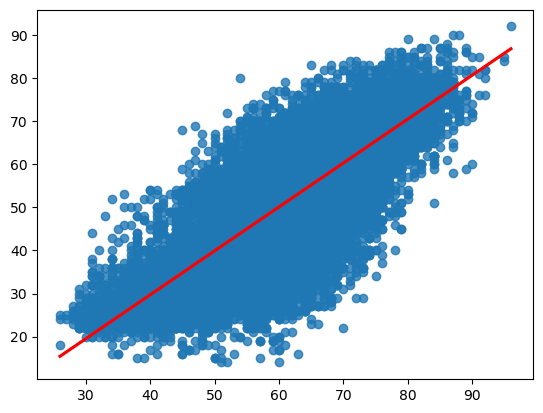

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming x_test and y_test are your test data
# Assuming you have a regplot object
regplot_result = sns.regplot(x=x_test.values.flatten(), y=y_test.values.flatten(), ci=None, line_kws={"color": "red"})

# Extracting the regression line parameters
slope, intercept = regplot_result.get_lines()[0].get_data()

# Make predictions using the regression line
y_pred = slope * x_test.values.flatten() + intercept

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Annotate with R-squared value
plt.annotate(f'R² = {r_squared:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

plt.show()


In [30]:
import statsmodels.api as sms
y = fifa_reg['dribbling']
X = fifa_reg[['shooting']]

# Add a constant term to the independent variables
X = sms.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# Fit the OLS model
model = sms.OLS(y_test, X_test)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dribbling   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                 3.152e+04
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:59:47   Log-Likelihood:                -75951.
No. Observations:               22796   AIC:                         1.519e+05
Df Residuals:                   22794   BIC:                         1.519e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.4202      0.174    186.703      0.000      32.080      32.761
shooting       0.5691      0.003    177.547      0.000       0.563       0.575
==============================================================================
Omnibus:                      198.875   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.045
Skew:                          -0.219   Prob(JB):                     1.81e-45
Kurtosis:                       3.158   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""